# Visión por Computadora

### Alan Reyes-Figueroa

# Arquitecturas Tradicionales de ConvNets
# (1980 - 2014)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time

from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Dense, Activation, Input, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import ZeroPadding2D, Dropout, Flatten
from tensorflow.keras.layers import Add, Subtract, Multiply #, Cropping2D?,  #Reshape?, 
from tensorflow.keras.layers import SimpleRNN 
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

### Download MNIST dataset

In [7]:
from tensorflow.keras.datasets import mnist

# download and read data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Pre-processing data

In [9]:
# reshape and normalisation
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [10]:
print('train images shape:', train_images.shape)
print('test images shape:', test_images.shape)

print('train labels shape:', train_labels.shape)
print('test labels shape:', test_labels.shape)

# data shape (sin la dimensión del batch_size)
print('data shape:', data_shape)

train images shape: (60000, 28, 28, 1)
test images shape: (10000, 28, 28, 1)
train labels shape: (60000, 10)
test labels shape: (10000, 10)
data shape: (28, 28, 1)


### Creating a (tiny) Keras model

In [14]:
def cNN(input_shape):
    I = Input(shape=input_shape, name='input')
    
    X = Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', name='conv1')(I)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool1')(X)
    
    X = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name='conv2')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool2')(X)
    
    X = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', name='conv3')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool3')(X)

    X = Flatten(name='flatten')(X)
    X = Dense(64, activation='relu', name='dense')(X)
    X = Dense(10, activation='softmax', name='classifier')(X)
    
    model = Model(I, X, name='CNN')
    return model

In [15]:
# this line delete the model if exist in memory
if 'convnet' in globals(): del convnet

# create new model
convnet = cNN(data_shape)

In [16]:
# print summary
convnet.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 16)        160       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        4640      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 conv3 (Conv2D)              (None, 7, 7, 64)          18496     
                                                                 
 maxpool3 (MaxPooling2D)     (None, 3, 3, 64)          0       

# Other Architectures

## LeNet5

In [17]:
def LeNet5(input_shape):
    I = Input(shape=input_shape, name='input')
    
    X = Conv2D(6, kernel_size=(5,5), activation='relu', name='conv1')(I)
    X = AveragePooling2D(pool_size=(2,2), name='avgpool1')(X)
    
    X = Conv2D(16, kernel_size=(5,5), activation='relu', name='conv2')(X)
    X = AveragePooling2D(pool_size=(2,2), name='avgpool2')(X)
    
    X = Flatten(name='flatten')(X)
    X = Dense(120, activation='relu', name='dense')(X)
    X = Dense(84, activation='softmax', name='classifier')(X)
    
    model = Model(I, X, name='Lenet5')
    return model

In [18]:
# this line delete the model if exist in memory
if 'lenet' in globals(): del lenet

# create new model
data_shape = (32, 32, 1)
lenet = LeNet5(data_shape)

In [19]:
lenet.summary()

Model: "Lenet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 6)         156       
                                                                 
 avgpool1 (AveragePooling2D)  (None, 14, 14, 6)        0         
                                                                 
 conv2 (Conv2D)              (None, 10, 10, 16)        2416      
                                                                 
 avgpool2 (AveragePooling2D)  (None, 5, 5, 16)         0         
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120

## AlexNet (Alex Krizhevsky, 2011)

In [20]:
def AlexNet(input_shape):
    I = Input(shape=input_shape, name='input')
    
    X = ZeroPadding2D((2,2), name='pad0')(I)
    X = Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', name='conv1')(X)
    X = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool1')(X)
    
    #X = ZeroPadding2D((1,1), name='pad1')(X)
    X = Conv2D(256, kernel_size=(5,5), padding='same', activation='relu', name='conv2')(X)
    X = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool2')(X)

    #X = ZeroPadding2D((1,1), name='pad2')(X)
    X = Conv2D(384, kernel_size=(3,3), padding='same', activation='relu', name='conv3')(X)
    #X = ZeroPadding2D((1,1), name='pad3')(X)
    X = Conv2D(384, kernel_size=(3,3), padding='same', activation='relu', name='conv4')(X)
    #X = ZeroPadding2D((1,1), name='pad4')(X)
    X = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', name='conv5')(X)
    #X = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool3')(X)
    X = Dropout(0.1, name='dropout')(X)
    
    X = Flatten(name='flatten')(X)
    X = Dense(4096, activation='relu', name='dense1')(X)
    X = Dense(4096, activation='relu', name='dense2')(X)
    X = Dense(1000, activation='softmax', name='classifier')(X)
    
    model = Model(I, X, name='AlexNet')
    return model

In [21]:
# this line delete the model if exist in memory
if 'alexnet' in globals(): del alexnet

# create new model
data_shape = (224, 224, 3)
alexnet = AlexNet(data_shape)

In [22]:
alexnet.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 pad0 (ZeroPadding2D)        (None, 228, 228, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 maxpool1 (MaxPooling2D)     (None, 27, 27, 96)        0         
                                                                 
 conv2 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 13, 13, 256)       0         
                                                                 
 conv3 (Conv2D)              (None, 13, 13, 384)       8851

## VGG

In [23]:
def VGG19(input_shape):
    I = Input(shape=input_shape, name='input')
    
    X = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', name='conv01')(I)
    X = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', name='conv02')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool1')(X)

    X = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', name='conv03')(X)
    X = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', name='conv04')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool2')(X)

    X = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', name='conv05')(X)
    X = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', name='conv06')(X)
    X = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', name='conv07')(X)
    X = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', name='conv08')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool3')(X)

    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv09')(X)
    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv10')(X)
    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv11')(X)
    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv12')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool4')(X)

    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv13')(X)
    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv14')(X)
    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv15')(X)
    X = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu', name='conv16')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool5')(X)
    
    X = Flatten(name='flatten')(X)
    X = Dense(4096, activation='relu', name='layer17')(X)
    X = Dense(4096, activation='relu', name='layer18')(X)
    X = Dense(1000, activation='softmax', name='layer19')(X)
    
    model = Model(I, X, name='VGG19')
    return model

In [24]:
# this line delete the model if exist in memory
if 'vgg19' in globals(): del vgg19

# create new model
data_shape = (224, 224, 3)
vgg19 = VGG19(data_shape)

In [26]:
print(vgg19.summary())

Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 conv01 (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv02 (Conv2D)             (None, 224, 224, 64)      36928     
                                                                 
 maxpool1 (MaxPooling2D)     (None, 112, 112, 64)      0         
                                                                 
 conv03 (Conv2D)             (None, 112, 112, 128)     73856     
                                                                 
 conv04 (Conv2D)             (None, 112, 112, 128)     147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 56, 56, 128)       0     

### Training

In [27]:
# setting optimizers, learning rate,
# loss function and metrics

opt = optimizers.legacy.RMSprop(learning_rate=0.001)
convnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# training model (just 5 epochs)

history = convnet.fit(train_images, train_labels, epochs=14, batch_size=128, validation_split=0.16666)

Epoch 1/14


2025-05-13 19:22:44.184471: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


391/391 [==============================] - 4s 10ms/step - loss: 0.3150 - accuracy: 0.9024 - val_loss: 0.0910 - val_accuracy: 0.9725
Epoch 2/14
391/391 [==============================] - 4s 10ms/step - loss: 0.0765 - accuracy: 0.9757 - val_loss: 0.0518 - val_accuracy: 0.9861
Epoch 3/14
391/391 [==============================] - 4s 11ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 4/14
391/391 [==============================] - 4s 11ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0455 - val_accuracy: 0.9876
Epoch 5/14
391/391 [==============================] - 4s 11ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.0358 - val_accuracy: 0.9904
Epoch 6/14
391/391 [==============================] - 5s 12ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0351 - val_accuracy: 0.9892
Epoch 7/14
391/391 [==============================] - 5s 12ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0462 - val_accuracy: 0.9886
Epoch 8/14

### Evaluating results

In [29]:
# evaluate net with the test set

results = convnet.evaluate(test_images, test_labels, verbose=0)
print('test loss: {} WOW!'.format(results[0]))
print('test accuracy: {} Otro WOW!'.format(results[1]))

test loss: 0.04436291381716728 WOW!
test accuracy: 0.9900000095367432 Otro WOW!


### Display training history plots

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

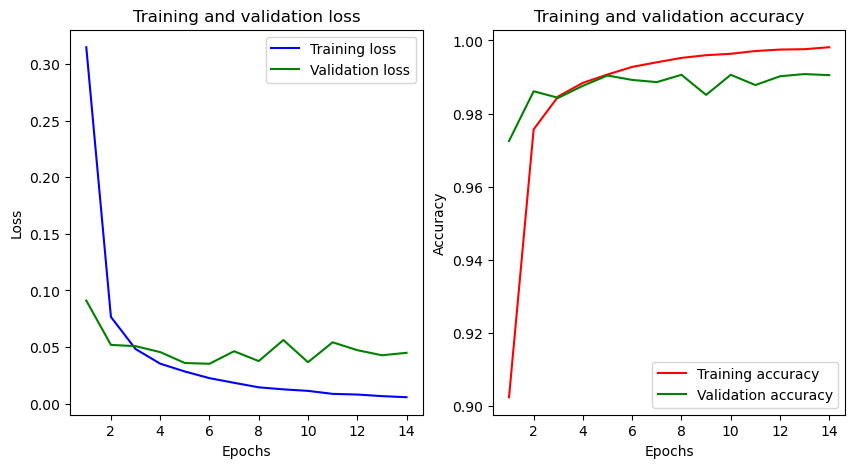

In [31]:
# plot training history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results

In [32]:
# predict test image labels

pred = convnet.predict(test_images)
predictions = np.argmax(pred, 1)

313/313 [==============================] - 1s 3ms/step


In [33]:
# set labels as the index with highest probability
test_labs = np.argmax(test_labels, 1)

In [34]:
## compute confusion matrix
#
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_labs, predictions)
#
#cf = pd.DataFrame(CM)
#pretty_plot_confusion_matrix(cf, annot=True, pred_val_axis='x', figsize=(7,7), fz=6)

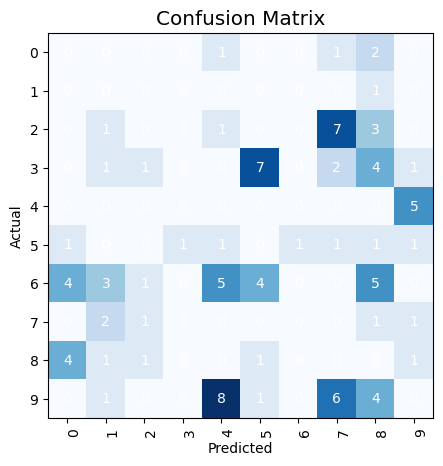

In [35]:
# other plot of comfusion matrix

PlotMatrix(CM, figsize=(5,5), cmap=plt.cm.Blues, title='Confusion Matrix', fz=12)

In [36]:
CM

array([[ 976,    0,    0,    0,    1,    0,    0,    1,    2,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    1, 1020,    0,    1,    0,    0,    7,    3,    0],
       [   0,    1,    1,  994,    0,    7,    0,    2,    4,    1],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   1,    0,    0,    1,    1,  885,    1,    1,    1,    1],
       [   4,    3,    1,    0,    5,    4,  936,    0,    5,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1023,    1,    1],
       [   4,    1,    1,    0,    0,    1,    0,    0,  966,    1],
       [   0,    1,    0,    0,    8,    1,    0,    6,    4,  989]])

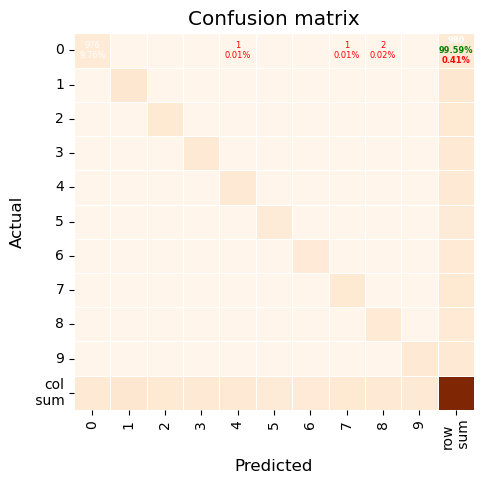

In [ ]:
cf = pd.DataFrame(CM)

# Esta función tiene errores (no genera todos los valores)!!!
pretty_plot_confusion_matrix(cf, annot=True, pred_val_axis='x', figsize=(5,5), fz=6)